In [1]:
# The following data were used for this assignment. They're provided as a part of the Data Visualization and Chartting course
#University of Michigan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df=df.transpose()

In [2]:
df.describe()

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


In [3]:
len(df)

3650

In [4]:
df.mean()

1992    33312.107476
1993    41861.859541
1994    39493.304941
1995    47743.550969
dtype: float64

In [5]:
#creating the confidence interval upper and lower boundary
ci=1.96*df.std()/(len(df)**0.5)

In [6]:
ci

1992    6508.897970
1993    3192.254314
1994    4553.902287
1995    2263.851744
dtype: float64

<IPython.core.display.Javascript object>


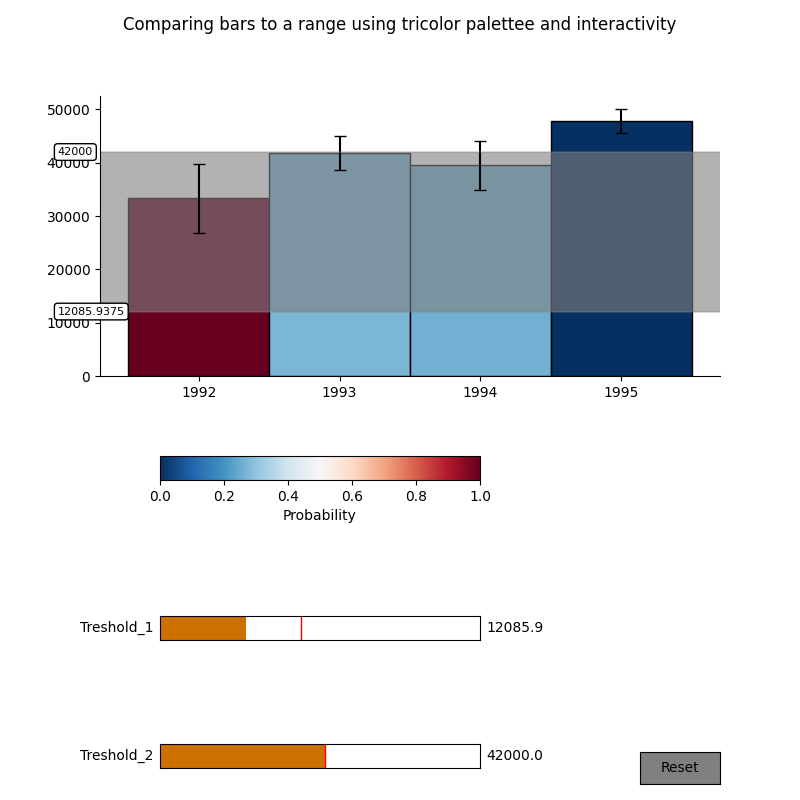

In [7]:
from matplotlib.widgets import Slider, Button
import matplotlib as mpl
import scipy
from scipy import stats

fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(2,1,1)
plt.suptitle('Comparing bars to a range using tricolor palettee and interactivity')

# Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

#defining initial y1 and y2 values for the range
y1=33000
y2=43000


#define probabilities function that calculates probability that the sample is in between y1 and y2
#probabilities will be used as a key value for the colorscheme
def probabilities(y1,y2):
    prob_92=scipy.stats.norm(32000, 200000/(3650**0.5)).cdf(y2) - scipy.stats.norm(32000, 200000/(3650**0.5)).cdf(y1)
    prob_93=scipy.stats.norm(43000, 100000/(3650**0.5)).cdf(y2) - scipy.stats.norm(43000, 100000/(3650**0.5)).cdf(y1)
    prob_94=scipy.stats.norm(43500, 140000/(3650**0.5)).cdf(y2) - scipy.stats.norm(43500, 140000/(3650**0.5)).cdf(y1)
    prob_95=scipy.stats.norm(48000, 70000/(3650**0.5)).cdf(y2) - scipy.stats.norm(48000, 70000/(3650**0.5)).cdf(y1)
    
    return (prob_92,prob_93,prob_94,prob_95)

#calculate inital probabilities
p=probabilities(y1,y2)

#add axes for colorbar
ax_clrs=fig.add_axes([0.2,0.4, 0.4, 0.03])

#define palette and normalize it
palette = plt.get_cmap('RdBu_r')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

#defining the colorbar
clrs_b = mpl.colorbar.ColorbarBase(ax_clrs, cmap=palette,norm=norm,orientation='horizontal')
clrs_b.set_label('Probability')

# Ploting the default data
clrs=[palette(p[0]), palette(p[1]), palette(p[2]),palette(p[3])]

# PLEASE CHECK THIS WHEN YOU RUN THE CODE -my version of jupyter notebook uses "x" instead "left"
ax1.bar(x=np.arange(4),height=df.mean(),width=1,color=clrs,
        edgecolor='black',tick_label=('1992','1993','1994','1995'),yerr=ci,capsize=4)
ax1.spines.top : False
    
ax1.axhline(y=y1,color='grey',ls='-',alpha=0.3)
ax1.axhline(y=y2,color='grey',ls='-',alpha=0.3)

adj = dict(boxstyle='round', facecolor='white')
ax1.text(-1, y1, str(y1), fontsize=8.0, va='center', ha='left', bbox=adj)
ax1.text(-1, y2, str(y2), fontsize=8.0, va='center', ha='left', bbox=adj)

ax1.axhspan(y1,y2,facecolor='grey',alpha=0.6)


#creating slider axes
ax_y1 = fig.add_axes([0.2,0.2, 0.4, 0.03])

ax_y2 = fig.add_axes([0.2,0.04, 0.4, 0.03])



#defining slider through Slider using slider axes
# Min and max values are not min and max values of the data set. They're just randomly chosen
s_y1 = Slider(ax=ax_y1, label='Treshold_1', valmin=-20000, valmax=100000, valinit=33000, valfmt='%1.1f',
             facecolor='#cc7000')

s_y2 = Slider(ax=ax_y2, label='Treshold_2', valmin=-20000, valmax=100000, valinit=42000, valfmt='%1.1f',
             facecolor='#cc7000')

#updating figure by changing parmaters of the distribution

def update(val):
    ax1.cla()
    y1=s_y1.val
    y2=s_y2.val
    p=probabilities(y1,y2)
    clrs=[palette(p[0]), palette(p[1]), palette(p[2]),palette(p[3])]
    ax1.bar(x=np.arange(4),height=df.mean(),width=1,edgecolor='black',color=clrs,
            yerr=ci,capsize=4,tick_label=('1992','1993','1994','1995'))
    ax1.axhline(y=y1,color='grey',ls='-',alpha=0.3)
    ax1.axhline(y=y2,color='grey',ls='-',alpha=0.3)
    
    ax1.text(-1, y1, str(y1), fontsize=8.0, va='center', ha='left', bbox=adj)
    ax1.text(-1, y2, str(y2), fontsize=8.0, va='center', ha='left', bbox=adj)
    
    ax1.axhspan(y1,y2,facecolor='grey',alpha=0.6)
    
    fig.canvas.draw_idle()

#activating sliders by calling "on_changed" and function "update"
s_y1.on_changed(update)

s_y2.on_changed(update)

#creating a reset button
resetax = plt.axes([0.8, 0.02, 0.1, 0.04])
button = Button(ax=resetax, label='Reset', color='grey', hovercolor='0.975')

def reset(event):
    s_y1.reset()
    s_y2.reset()
    
button.on_clicked(reset)


#for box next to hor line
adj = dict(boxstyle='round', facecolor='white')
ax1.text(-1, y1, str(y1), fontsize=8.0, va='center', ha='left', bbox=adj)
plt.show()

plt.savefig('Bars and range_final.png')

Text(-1, 33000, '33000')